# 자동충전=자동혜택 이벤트 결과 리포트
-----
+ **기간** : 19.02.01 ~ 19.04.30 (88일)


+ **목적** : Maeil Do! 기프트카드 자동충전 고객 확보


+ **구분** : 참여 유도형 이벤트


+ **혜택** : 기프트카드 자동충전 시, 아이스크림 무료 쿠폰 지급(익월)


+ **타겟**
  + 1순위 : 기존 자동충전 설정 고객
  + 2순위 : 기프트카드 이용 고객
    (별도 문자발송 없이 진행됨)
  

+ **베너**(최근진행 / 이전진행)

   <img src="https://www.maeildo.com/imageserver/event/2019/01/16897ca69a78.png" style="width: auto; height:200px; float:left;">



In [ ]:
#    <img src="https://www.maeildo.com/imageserver/event/2018/08/165897bdfa12.png" style="width: auto; height:200px;";>

작성일자 : 2019.05.24

---
# Summary

## 1.자동충전 이벤트 효과

+ [x] 월별 충전 현황
+ [x] 이벤트 효과 분석  
  + [x] 분석1 : 전기 대비 증가로 추정.
  + [ ] ~~분석2 : 직전 충전 여부로 판단.~~
+ [x] 성과 평가
  + [x] 비용 : 829천원/월 (쿠폰비용)
  + [x] 효과 : 2,978천원/월 (추가 충전 유발)
  + [x] ROAS : 3.60(=효과/비용)

---
## 2.주요 영향 변수 : 당첨/미당첨 결정 요소

+ [x] 자료 전처리
+ [x] 모델링(예측 기반, 중요변수 확인)
  + [x] Decision Tree(CART) : 이벤트 참여 여부에 대해, 순서대로 변수를 설정함
  + [x] Random Forest(RF) : 이벤트 참여 여부에 대해, 중요한 변수를 판별함
  + [ ] Logistic Regression(LR)
  + [ ] Linear Discriminant Analysis(LAD)
  + [ ] K-Neighbors Classifier(KNN)
  + [ ] Gaussian NB(NB)
  + [ ] Support Vector Machine(SVC)
+ [x] To-Do List : 충전 활성화를 위해서는, [사용]에 대한 촉진/프로모션이 필요함

---
## Appendix.회원 Profile
+ [x] data format
+ [x] 성별/연령대
+ [x] 지역
+ [x] 충전주기
  + [x] 월 충전 횟수 및 주기 : 6.3회 / 45.2일
  + [x] 월 충전 횟수와 주기와의 관계 : 반비례 (e.g. 사용에 한계가 있어, 충전역시 한계가 있음)

### code on/off

In [1]:
# code 숨기기

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data 불러오기 : 충전 row 자료
df = pd.read_csv('./report/190516_CARD.csv', encoding = 'cp949', low_memory=False)

# data 불러오기 : card보유자 기준, 정보 호출
df2_1 = pd.read_csv('./report/190516_CRD_member.csv', encoding = 'cp949', low_memory=False)
df2_2 = pd.read_csv('./report/190516_CRD_point.csv', encoding = 'cp949', low_memory=False)
df2_2.fillna(0)

df2 = pd.merge(df2_1, df2_2)

# 일부 colunm 형태 보정
# df["YYYYMM"] = df.YYYYMM.astype(object)
df['REG_DT'] = pd.to_datetime(df['REG_DT'],format=None)
# df['YYYYMM'] = pd.to_datetime(df['YYYYMM'],format=True)
# df['쿠폰사용일'] = pd.to_datetime(df['쿠폰사용일'],format=None)

### 1.월 일반/자동충전 현황

In [10]:
# 월별 충전 : 일반 vs 자동
data1_M1 = df.groupby(by = ['YYYYMM', 'GUBUN'],as_index=False)['SETL_AMT'].sum()
data1_M1.rename(columns={'YYYYMM': 'date', 'SETL_AMT': '충전금액'}, inplace=True)

#### Graph

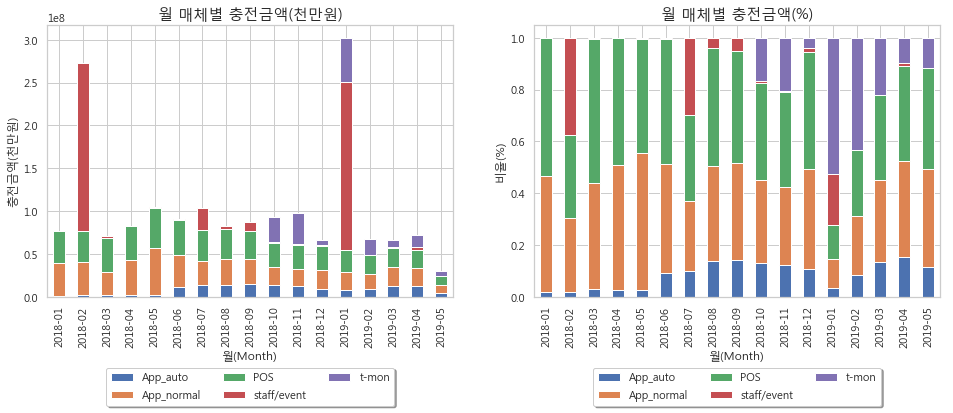

In [12]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(df.YYYYMM, df.GUBUN, df.SETL_AMT, aggfunc="sum").plot.bar(stacked=True, ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=3)
# plt.axvspan(10.5, 12.5, color='gray', alpha=0.3)
# plt.axvspan(12.5, 15.5, color='red', alpha=0.2)
plt.title('월 매체별 충전금액(천만원)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('충전금액(천만원)')

ax = plt.subplot(1,2,2)
pd.crosstab(df.YYYYMM, df.GUBUN, normalize='index').plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=3)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('월 매체별 충전금액(%)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('비율(%)')

plt.show()


**Comment : 기프트카드 충전 현황**
+ 기프트카드는 상기 그래프와 같이 5가지 유형으로 충전을 지원하고 있음.
+ 이 중, staff/event 및 t-mon 충전의 경우, 특정 기간에만 충전이 가능함.  
  $\to$ 해당 유형은 자동충전 유도의 대상이 되기 어려운 바, 분석에서는 제외하고자 함
+ 때문에, 자동충전 유입효과는 App 일반충전, App 자동충전 및 POS 충전 이력이 있는 대상자로 한정하여 분석을 진행하고자 함.

### 2.분석의 대상 및 기간 설정

#### Graph

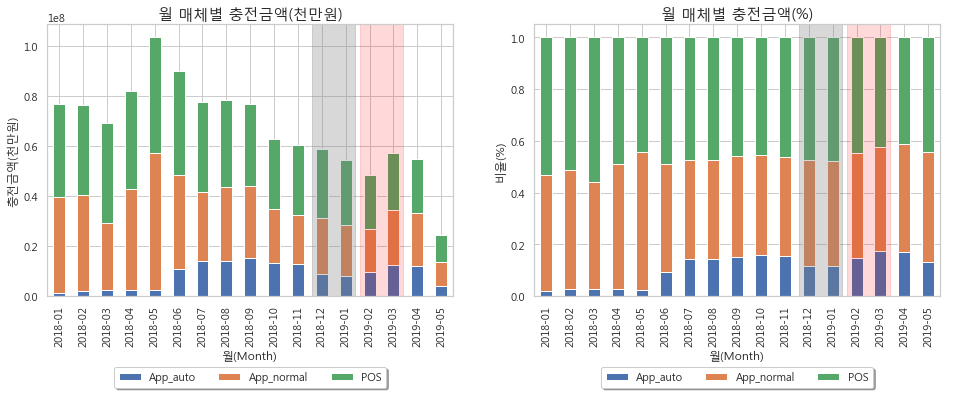

In [45]:
# data 필터링
df_b = df[(df['GUBUN'] !='staff/event')]
df_b = df_b[(df_b['GUBUN'] !='t-mon')]

# plot show
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(df_b.YYYYMM, df_b.GUBUN, df_b.SETL_AMT, aggfunc="sum").plot.bar(stacked=True, ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=3)
plt.axvspan(10.6, 12.4, color='gray', alpha=0.3)
plt.axvspan(12.6, 14.4, color='red', alpha=0.15)
plt.title('월 매체별 충전금액(천만원)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('충전금액(천만원)')

ax = plt.subplot(1,2,2)
pd.crosstab(df_b.YYYYMM, df_b.GUBUN, normalize='index').plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=3)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvspan(10.6, 12.4, color='gray', alpha=0.3)
plt.axvspan(12.6, 14.4, color='red', alpha=0.15)
plt.title('월 매체별 충전금액(%)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('비율(%)')

plt.show()

**Comment : 분석대상 및 분석기간 설정**
+ 앞서 언급한 것 처럼, 3가지 유형(App 자동충전, App 일반충전, POS 충전)에 대해, 이벤트가 자동충전으로 전환 유도 여부를 분석하고자 함.
+ 분석은 대상기간(붉은색)과 이전기간(회색)의 비교를 통해 수치화 하고자 함.  
  (19년 4월의 경우, 유지로 판단하여 분석에서 제외됨)

### Appnedix. 분석의 대상 및 기간 설정 : t-mon카드 포함시

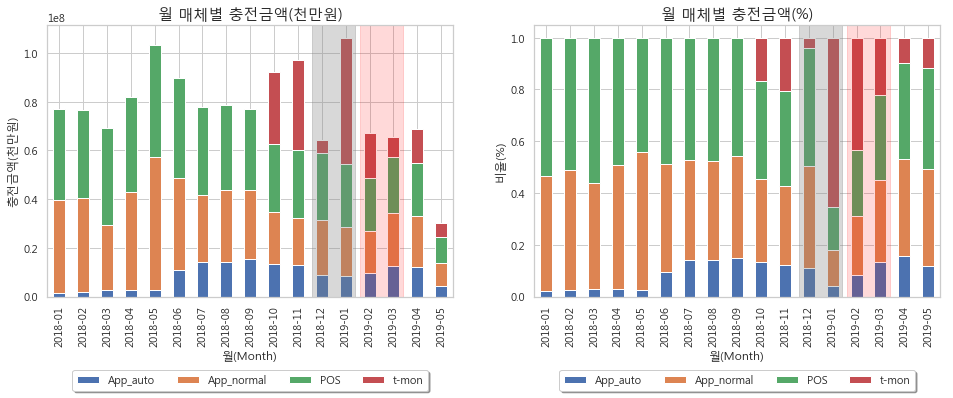

In [46]:
# data 필터링
df_b = df[(df['GUBUN'] !='staff/event')]

# plot show
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(df_b.YYYYMM, df_b.GUBUN, df_b.SETL_AMT, aggfunc="sum").plot.bar(stacked=True, ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
plt.axvspan(10.6, 12.4, color='gray', alpha=0.3)
plt.axvspan(12.6, 14.4, color='red', alpha=0.15)
plt.title('월 매체별 충전금액(천만원)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('충전금액(천만원)')

ax = plt.subplot(1,2,2)
pd.crosstab(df_b.YYYYMM, df_b.GUBUN, normalize='index').plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvspan(10.6, 12.4, color='gray', alpha=0.3)
plt.axvspan(12.6, 14.4, color='red', alpha=0.15)
plt.title('월 매체별 충전금액(%)',fontsize=15)
plt.xlabel('월(Month)')
plt.ylabel('비율(%)')

plt.show()

**Comment : t-mon충전에 대해, 분석 제외 사유**
+ t-mon 충전의 경우, 19년 2월~4월의 경우에는 다른 충전 수단과 같이, 큰 변화를 보이지 않음.
+ 그러나 특정 기간에만 운영(판매) 되며, Open 시점에 금액의 늘어나는 특성을 보이므로, t-mon 충전은 일시적인 충전효과로 분류하는 것이 타당해 보임.  
  (e.g. t-mon충전은 일반충전의 유형으로 보기 어려움.)

### 이벤트 효과 분석

+ 방법 : 당기와 전기의 비교
  + 이벤트 시점과 이전 시점을 비교하여, 효과를 측정하는 방식을 의미함.
  + 다만, 1)11월까지는 경우 자동충전 이벤트가 진행되면서 비교가 어렵고, 2)진행/미진행의 기간이 다르므로, 평균값을 사용하여 추정하고자 함.
  + 해당 기준으로 측정하면, **인원 기준 84명/월**이 증가 / **금액 기준 2,987천원/월**의 증가 효과가 확인됨.
+ 측정지표 : 추가유입 인원이 충전한 금액
  + 이벤트 이후, 일반충전에서 자동충전으로 유입 인원으로 효과를 보고자 함
  + 해당 인원이 충전한 금액을 효과로 봄 
  + ~~해당 기준으로 측정하면, 인원 기준 96명이 증가 / 금액 기준  3,050천원이 증가하였다.~~

### 이벤트 효과 분석 : 당기와 전기의 비교

In [8]:
# 일반/자동충전만 필터링
dataD_1 = df[(df['GUBUN'] =='App_auto') | (df['GUBUN'] =='App_normal')]  

# 월별/개인별/유형별 금액합산
dataD_2 = dataD_1.groupby(by = ['UNFY_MMB_NO', 'YYYYMM', 'GUBUN'],as_index=False)['SETL_AMT'].sum()

# 월별/개인별/유형별 금액합산 중, 3만원 이상만 필터링
dataD_3 = dataD_2[(dataD_2['SETL_AMT'] > 29999) ]

# 월별/유형별 인원 수 확인
dataD_4 = dataD_3.groupby(by = ['UNFY_MMB_NO'],as_index=False)['YYYYMM'].count()

In [15]:
dataD_32 = pd.merge(dataD_3, dataD_C, on ='UNFY_MMB_NO', how = 'left')
dataD_33 = dataD_32.groupby(by = ['A', 'B'],as_index=False)['SETL_AMT'].sum()

In [16]:
dataD_A = dataD_1[(dataD_1['GUBUN'] =='App_auto') & ((dataD_1['YYYYMM'] =='2019-01') | (dataD_1['YYYYMM'] =='2018-12'))]
dataD_A['A'] =1
dataD_A = dataD_A.groupby(by = ['UNFY_MMB_NO'],as_index=False)['A'].mean()

dataD_B = dataD_1[(dataD_1['GUBUN'] =='App_auto') & ((dataD_1['YYYYMM'] =='2019-02') | (dataD_1['YYYYMM'] =='2019-03') )]
dataD_B['B'] =1
dataD_B = dataD_B.groupby(by = ['UNFY_MMB_NO'],as_index=False)['B'].mean()

dataD_C = pd.merge(dataD_4, dataD_A,on ='UNFY_MMB_NO', how = 'left')
dataD_C = pd.merge(dataD_C, dataD_B,on ='UNFY_MMB_NO', how = 'left')

dataD_C = dataD_C.fillna(0)

dataD_D = dataD_C.groupby(by = ['UNFY_MMB_NO'],as_index=False)['A', 'B'].mean()

In [17]:
dataD_A = dataD_1[(dataD_1['GUBUN'] =='App_auto') & ((dataD_1['YYYYMM'] =='2019-10') | (dataD_1['YYYYMM'] =='2018-11'))]
dataD_A['A'] =1
dataD_A = dataD_A.groupby(by = ['UNFY_MMB_NO'],as_index=False)['A'].mean()

dataD_B = dataD_1[(dataD_1['GUBUN'] =='App_auto') & ((dataD_1['YYYYMM'] =='2019-01') | (dataD_1['YYYYMM'] =='2018-12'))]
dataD_B['B'] =1
dataD_B = dataD_B.groupby(by = ['UNFY_MMB_NO'],as_index=False)['B'].mean()

dataD_C = pd.merge(dataD_4, dataD_A,on ='UNFY_MMB_NO', how = 'left')
dataD_C = pd.merge(dataD_C, dataD_B,on ='UNFY_MMB_NO', how = 'left')

dataD_C = dataD_C.fillna(0)

dataD_D = dataD_C.groupby(by = ['UNFY_MMB_NO'],as_index=False)['A', 'B'].mean()

In [18]:
dataD_C.head()

,UNFY_MMB_NO,YYYYMM,A,B
0,412054,6,1.0,1.0
1,465462,2,0.0,0.0
2,468441,2,0.0,0.0
3,472877,1,0.0,0.0
4,484563,1,0.0,0.0


In [19]:
dataD_D.groupby(by =['A', 'B'],as_index=False).count()
dataD_D.rename(columns={'A': '전기충전', 'B': '당기충전', 'UNFY_MMB_NO' : '인원'}, inplace=True)

In [20]:
# dataD_D.head()

In [21]:
dataD_D.groupby(by = ['전기충전', '당기충전'],as_index=False)['인원'].count()

,전기충전,당기충전,인원
0,0.0,0.0,3029
1,0.0,1.0,143
2,1.0,0.0,180
3,1.0,1.0,186


In [22]:
# 일반 -> 일반
dataD_C[(dataD_C['A'] == 0 ) & (dataD_C['B'] == 0)]['UNFY_MMB_NO'].count()

3029

In [23]:
# 일반 - > 자동(유입, 대상)
dataD_C[(dataD_C['A'] == 0 ) & (dataD_C['B'] == 1)]['UNFY_MMB_NO'].count()

143

**Comment : 이벤트 효과 측정방법 및 결과**
+ "전기(18년 12월 및 19년 1월)에 일반충전을 한 인원 중, 당기(19년 2월 및 3월)에 자동충전한 인원"을 이벤트 효과가 있는 것으로 분석하고자 함.
  + 때문에, 해당 "인원"이 충전한 금액을 이벤트 효과로 인해 발생한 금액으로 정의하고, 비용과의 비료를 위해 월 평균값으로 변환하고자 함.
+ 전기(18년 12월 및 19년 1월)에 일반충전(0)을 한 회원수는 3,209명으로 확인됨.
+ 해당 인원 중, 당기(19년 2월 및 3월)에  자동충전한 인원은 235명으로 확인됨(인원대비 7.3%)
+ 즉, 일반 $\to$ 자동충전으로 전환한 235명이 충전한 금액은 000원임.
+ 따라서, 이벤트를 통해 발생한 월 평균 효과는 금액기준 000원 임.

In [24]:
# 일반/자동충전만 필터링
dataE_1 = df[(df['GUBUN'] =='App_auto') | (df['GUBUN'] =='App_normal')]  

# 월별/개인별/유형별 금액합산
dataE_2 = dataE_1.groupby(by = ['UNFY_MMB_NO', 'YYYYMM', 'GUBUN'],as_index=False)['SETL_AMT'].sum()

# 월별/개인별/유형별 금액합산 중, 3만원 이상만 필터링
dataE_3 = dataE_2[(dataE_2['SETL_AMT'] > 29999)]

# 월별/유형별 금액 확인
dataE_4 = dataE_3.groupby(by = ['YYYYMM', 'GUBUN'],as_index=False)['SETL_AMT'].sum()


#### Graph

### 성과 평가

## III.주요 영향 변수 : 참여/미참여 결정 요인

In [3]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df20 = df2.copy().dropna()

In [25]:
df20 = df2.copy().dropna()
# 이전기간에 일반충전한 인원이, 자동충전으로 전환된 경우
df20 = pd.merge(df20, dataD_C[(dataD_C['A'] == 0 )], on ='UNFY_MMB_NO')

feature1= ['연령', '성별',  '충전총액', '사용총액', '카드발급겟수', '이벤트참여_1809', 'USE_POINT', 'RESERVE_POINT']
feature2= ['연령', '성별',  '충전총액', '사용총액', '카드발급겟수', 'USE_POINT', 'RESERVE_POINT']

dfX1 = df20[feature1].copy()
dfy1 = df20["이벤트참여_1902"].copy()

dfX2 = df20[feature2].copy()
dfy2 = df20["이벤트참여_1902"].copy()

dfX1["성별"] = LabelEncoder().fit_transform(dfX1["성별"])
dfX2["성별"] = LabelEncoder().fit_transform(dfX2["성별"])

# data split(train / test)
X1_train, X1_test, y1_train, y1_test = train_test_split(dfX1, dfy1, test_size=0.1, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(dfX2, dfy2, test_size=0.1, random_state=0)


In [26]:
#### 1. 모델링 자료 분류

In [27]:
dfX1.groupby(by = ['이벤트참여_1809'],as_index=False )['연령'].count()

,이벤트참여_1809,연령
0,0,1656
1,1,193


### Compare Algorithms


In [28]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load dataset : array type
X = dfX2.values
Y = dfy2.values

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [61]:
%%time

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     msg.append(msg)
#     print(msg)

Wall time: 3.01 s


### 모델링 개요

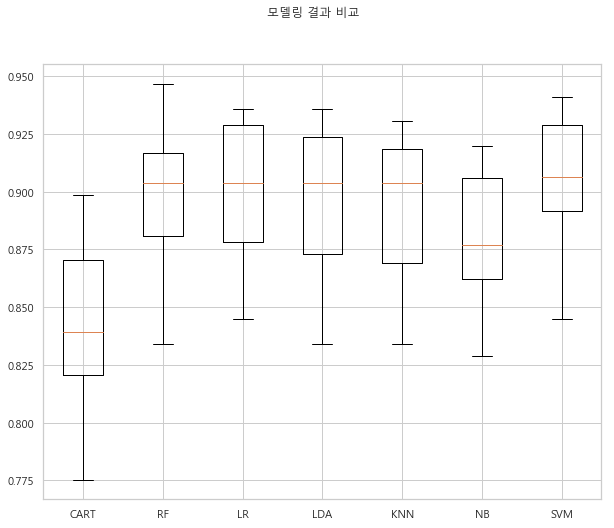

In [62]:
# boxplot algorithm comparison

mpl.rc('figure', figsize=(10, 8))

fig = plt.figure()
# plt.axvspan(0.6, 2.4, color='gray', alpha=0.5)
fig.suptitle('모델링 결과 비교')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Comment : 모델링 목적은 "주요 영향변수의 도출"임**
+ 금번 모델링의 목적은 **결과에 영향을 끼친 요인** 을 발굴하기 위함임.  
  $\to$ 즉, 일반충전에서 자동충전으로 변경 인원에 대해, 차이를 보인 변수를 자료에서 찾고자 함.
+ 이를 위해, 머신러닝 방법론 중, 1)의사결정 나무와 2)랜덤 포레스트에 대해 진행한 다음, 자동충전으로 전환에 영향을 크게 준 변수를 확인하고자 함.  
  $\to$ 주로 활용되는 2개 모형을 이용하여, 우선 분석을 진행하고자 함.  
  $\to$ 다른 모형들과 예측결과를 비교하면, 상기 그래프와 같음

### Modeling 1 : Decision tree

In [29]:
# 모형 실행 : Decision Tree
model_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X1_train, y1_train)
model_tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X2_train, y2_train)

#### Decision Tree : Model-1 : 과거 이벤트 포함

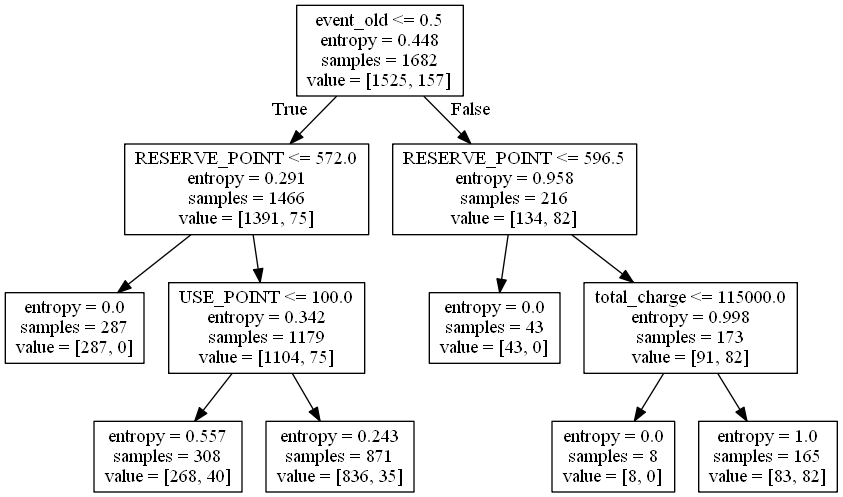

In [64]:
# 모형 시각화 : Decision Tree
command_buf1 = io.StringIO()
export_graphviz(model_tree1, 
                out_file=command_buf1, 
                feature_names=['age', 'gender', 'total_charge', 'total_use', 'card_count', 'event_old', 'USE_POINT', 'RESERVE_POINT'])
graph1 = pydot.graph_from_dot_data(command_buf1.getvalue())[0]
image1 = graph1.create_png()

Image(image1)

#### Decision Tree : Model-2 : 과거 이벤트 제외

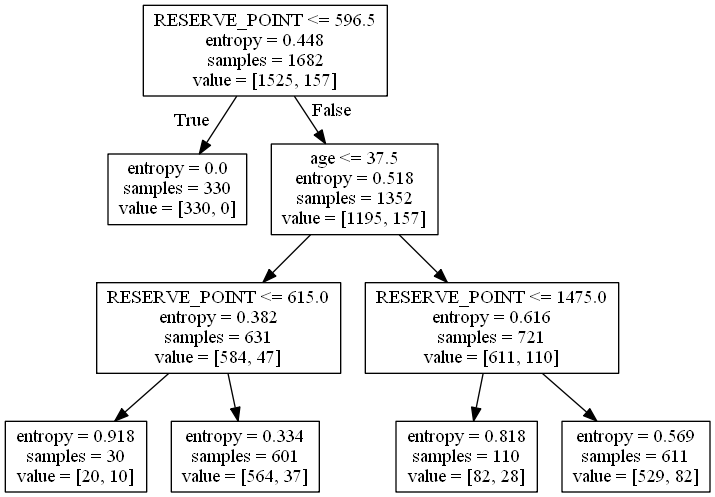

In [65]:
command_buf2 = io.StringIO()
export_graphviz(model_tree2, 
                out_file=command_buf2, 
                feature_names=['age', 'gender', 'total_charge', 'total_use', 'card_count','USE_POINT', 'RESERVE_POINT'])
graph2 = pydot.graph_from_dot_data(command_buf2.getvalue())[0]
image2 = graph2.create_png()

Image(image2)

+ 전기(18년 12월 및 19년 1월)에 일반충전을 한 인원 중, 당기(19년 2월 및 3월)에 자동충전한 인원을 이벤트 효과가 있는 것으로 분석하고자 함.
+ 전기(18년 12월 및 19년 1월)에 일반충전을 한 회원은 1,869명으로 확인되었으며, 이중에서 모델링을 위해 10%를 제외한 1,682명을 대상으로 모델링을 진행함
+ 모형의 대상이 된 1,682명 중, 전기에는 일반충전을 하였으나 당기에는 자동충전으로 전환된 인원은 157명(9.3%) 이다.  
  $\to$ 해당 인원에 대해서는 이벤트 효과가 있다고 판단됨 
+ [모형1]의 경우, **과거 진행된 이벤트 참여(event_old)**가 가장 중요한 가운데, **포인트 적립금액(RESERVE_POINT)**역시 중요한 변수로 확인됨.
+ [모형2]와 같이 이전 [과거 진행된 이벤트 참여]변수를 제외할 경우, **나이(age) 또한** 중요 변수로 확인됨.

### 의사결정 나무 : 중요변수 비교

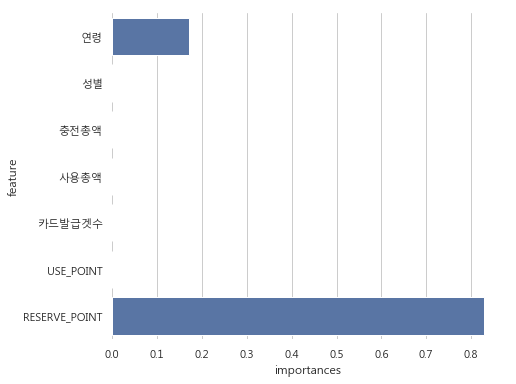

In [66]:
# 모형 중요변수 : Decision Tree

df2_1_0 = pd.DataFrame(feature1, columns =['feature'])
df2_1_1 = pd.DataFrame(model_tree1.feature_importances_, columns =['importances'])
model1_1 = pd.concat([df2_1_0, df2_1_1], axis=1)
# df2_3

df2_2_0 = pd.DataFrame(feature2, columns =['feature'])
df2_2_1 = pd.DataFrame(model_tree2.feature_importances_, columns =['importances'])
model1_2 = pd.concat([df2_2_0, df2_2_1], axis=1)

mpl.rc('figure', figsize=(7, 6))

# plt.subplot(2,3,1)
# sns.barplot(y= model1_1['feature'], x= model1_1['importances'], color ='b')
# sns.despine(left=True, bottom=True)
# plt.title('Decision Tree Model 1',fontsize=15)

# plt.subplot(2,3,2)
sns.barplot(y= model1_2['feature'], x= model1_2['importances'], color ='b')
sns.despine(left=True, bottom=True)
# plt.title('Decision Tree Model 2',fontsize=15)

plt.show()

**Comment : 1)과거 진행된 이벤트 참여, 2)포인트 적립금액, 3)연령 이 중요변수**

+ 의사결정 나무를 이용 시, "이전 이벤트 참여 여부"가 변수로 있는 경우를 [모형1],"이전 이벤트 참여 여부"가 변수로 없는 경우를 [모형2]로 설정함.
+ 실제로, **과거 진행된 이벤트 참여(event_old)** 가 가장 중요한 변수로 확인됨(Decision Tree Model 1)
+ 아울러, "이전 이벤트 참여 여부"를 무시한 [모형2]의 경우, **포인트 적립금액(RESERVE_POINT)** 및 연령이 중요한 변수로 확인됨.
+ 따라서, 해당 모형을 통해, 1)과거 진행된 이벤트 참여, 2)포인트 적립금액, 3)연령 이 중요한 변수로 확인 가능함

### 3.RandomForest  : 중요 변수 확인

In [30]:
# 모듈 호출
from sklearn.ensemble import RandomForestClassifier

#### Random Forest : Modeling

In [31]:
%%time

# 모형 실행 : random forest
rf1 = RandomForestClassifier(n_estimators=1000, random_state=0)
rf1.fit(X1_train, y1_train)
importances1 = rf1.feature_importances_

rf2 = RandomForestClassifier(n_estimators=1000, random_state=0)
rf2.fit(X2_train, y2_train)
importances2 = rf2.feature_importances_

Wall time: 3.63 s


### 의사결정 나무 : 중요변수 비교

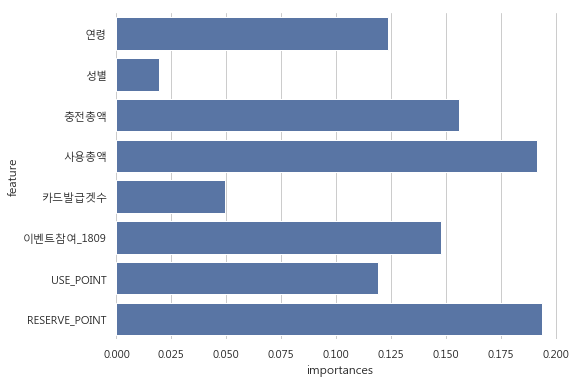

In [69]:
# 모형 시각화 : random forest

df2_3_0 = pd.DataFrame(feature1, columns =['feature'])
df2_3_1 = pd.DataFrame(importances1, columns =['importances'])
model2_1 = pd.concat([df2_3_0, df2_3_1], axis=1)

df2_4_0 = pd.DataFrame(feature2, columns =['feature'])
df2_4_1 = pd.DataFrame(importances2, columns =['importances'])
model2_2 = pd.concat([df2_4_0, df2_4_1], axis=1)

mpl.rc('figure', figsize=(8, 6))

# plt.subplot(1,2,1)
sns.barplot(y= model2_1['feature'], x= model2_1['importances'], color ='b')
sns.despine(left=True, bottom=True)
# plt.title('Random Forest Model 1',fontsize=15)

# plt.subplot(1,2,2)
# sns.barplot(y= model2_2['feature'], x= model2_2['importances'], color ='b')
# sns.despine(left=True, bottom=True)
# plt.title('Random Forest Model 2',fontsize=15)

plt.show()

**Comment : 1)포인트 적립금액, 2)사용총액, 3)충전총액 이 중요변수**

+ 랜덤 포레스트를 이용 시에도, "이전 이벤트 참여 여부"가 변수로 있는 경우를 [모형3],"이전 이벤트 참여 여부"가 변수로 없는 경우를 [모형4]로 설정함.
+ [모형3]에서는 **과거 진행된 이벤트 참여(event_old)** 보다 중요한 변수로 1) **포인트 적립금액(RESERVE_POINT)** , 2) **사용총액**, 3) **충전총액** 이 중요 변수로 판별됨
+ 아울러, "이전 이벤트 참여 여부"를 무시한 [모형4]는 [모형3]과 동일한 결론이 도출됨 
+ 따라서, 해당 모형을 통해, 1)과거 진행된 이벤트 참여, 2)포인트 적립금액, 3)연령 이 중요한 변수로 확인 가능함

#### Appendix.모형 평가  : Decision Tree

In [34]:
%%time

# 모형 평가 : Decision Tree Model 1
dt_predict = model_tree2.predict(X2_test)
dt_cv_score = cross_val_score(model_tree2, X2_test, y2_test, cv=10, scoring = 'accuracy' )

print("======= Confusion Matrix =======")
print(confusion_matrix(y2_test, dt_predict))
print('\n')
print("======= Classification Report =======")
print(classification_report(y2_test, dt_predict))
print('\n')
print("======= All AUC Scores =======")
print(dt_cv_score)
print('\n')
print("======= Mean AUC Score =======")
print("Mean AUC Score - Decision Tree: ", dt_cv_score.mean())
print('\n')


======= Confusion Matrix =======
[[170   0]
 [ 15   0]]


======= Classification Report =======
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       170
           1       0.00      0.00      0.00        15

   micro avg       0.92      0.92      0.92       185
   macro avg       0.46      0.50      0.48       185
weighted avg       0.84      0.92      0.88       185



======= All AUC Scores =======
[0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.94444444
 0.94444444 0.94444444 0.94444444 0.94444444]


======= Mean AUC Score =======
Mean AUC Score - Decision Tree:  0.9195906432748538


Wall time: 101 ms


NameError: name 'rf_predict' is not defined

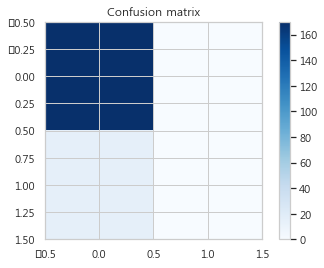

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(rf_predict)))
    plt.xticks(tick_marks, set(rf_predict), rotation=45)
    plt.yticks(tick_marks, set(rf_predict))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y2_test, dt_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

#### Appendix.모형 평가  : Random Forest

In [71]:
%%time

# 모형 평가 : random forest

rf_cv_score = cross_val_score(rf2, X2_test, y2_test, cv=10, scoring = 'accuracy' )
rf_predict = rf2.predict(X2_test)

print("=========== Confusion Matrix ===========")
print(confusion_matrix(y2_test, rf_predict))
print('\n')
print("=========== Classification Report ===========")
print(classification_report(y2_test, rf_predict))
print('\n')
print("=========== All AUC Scores ===========")
print(rf_cv_score)
print('\n')
print("=========== Mean AUC Score ===========")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())
print('\n')

=========== Confusion Matrix ===========
[[167   1]
 [ 19   0]]


=========== Classification Report ===========
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       168
           1       0.00      0.00      0.00        19

   micro avg       0.89      0.89      0.89       187
   macro avg       0.45      0.50      0.47       187
weighted avg       0.81      0.89      0.85       187



=========== All AUC Scores ===========
[0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.84210526 0.89473684 0.88888889 0.94117647]


=========== Mean AUC Score ===========
Mean AUC Score - Random Forest:  0.8935328517371861


Wall time: 7.79 s


**Connemt**
+ 렌덤 포레스트 모형의 정확도는 **96.2%**임.
+ 모형에서 [이벤트 참여] 여부를 가르는 중요 변수로 1)사용총액 > 2)충전총액 > 3)이전 이벤트 참여 가 중요한 것으로 확인됨.  
 $\to$ 즉, 자동충전을 위해서는 어느 정도의 **[기프트카드 사용]의 장려**가 필요한 상황임.

#### 중요 변수 Visualization

In [100]:
# data = df2.copy().fillna(0)
data = df2.copy().dropna()
data['사용총액_log'] = np.log(data['사용총액'])
data['RESERVE_POINT_log'] = np.log(data['RESERVE_POINT'])
data['이벤트참여횟수'] = data['이벤트참여_1902'] + data['이벤트참여_1809']

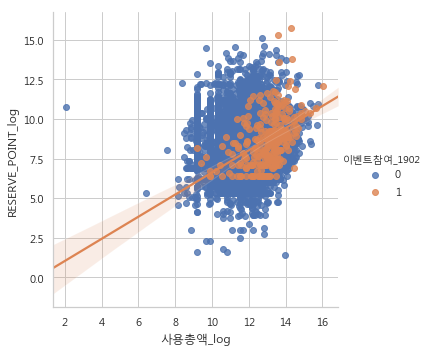

In [101]:
sns.lmplot(x = '사용총액_log', y= 'RESERVE_POINT_log',data = data, hue = '이벤트참여_1902')
plt.show()

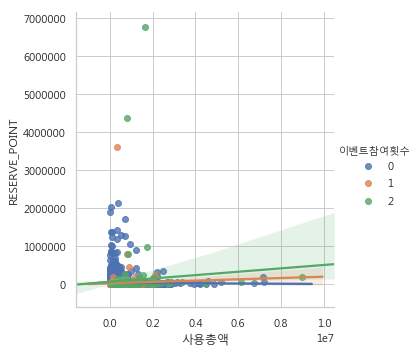

In [103]:
sns.lmplot(x = '사용총액', y= 'RESERVE_POINT',data = data, hue = '이벤트참여횟수')
plt.show()

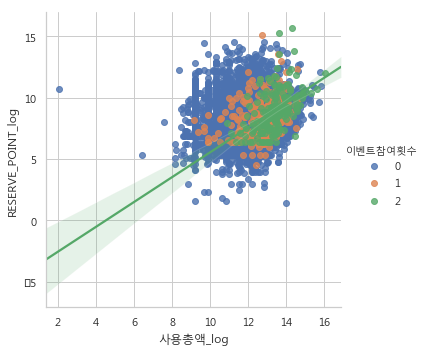

In [102]:
sns.lmplot(x = '사용총액_log', y= 'RESERVE_POINT_log',data = data, hue = '이벤트참여횟수')
plt.show()

**Comment**

+ 상기 두 모형 결과를 토대로, [포인트 적립]과 [기프트카드 사용금액]이 큰 고객에 대해, 참여자의 분포를 보고자 함
+ 단, [포인트 적립]과 [기프트카드 사용금액]은 기준값이 많이 다르므로, 로그값으로 변환 plot을 표시하면 위와 같음
+ 아울러, 이전 기프트카드 자동충전 이벤트까지 같이 보게되면, 이전에 기프트카드 자동충전 이벤트에 참여한 회원의 [포인트 적립]과 [기프트카드 사용금액]이 높게 나옴
  + [포인트 적립]의 경우 동기간에 진행된 "Point 리워드"의 영향에 따른 것으로 보이므로, 해당 내용을 주요 요소로 보는 데 지장이 없을 것으로 판단됨

**Comment**

+ 금번 분석에 진행한 의사결정나무(CART) 및 렌덤 포레트스(RF)에 대해서만 진행함  
  $\to$ 렌덤 포레트스(RF)의 경우, 다른 모델의 경우에도 정확도에는 별다른 차이를 보이지 않음
+ 전반적으로, 정확도가 높게 나온것이 문제로 판단됨  
  (단, 이는 이벤트 대상인원이 작아서 발생한 문제로 보이므로, sampling 변경 후 추가 검증이 필요함)

## To-Do List
+ 사용수량(351껀) 및 ROAS(2.81)가 적정수준으로 나오는 등, 전반적으로 괜찮은 성과를 보임

+ 일반충전에 비해, 자동충전의 인당 충전이 높게나오므로, 충전규모의 확보를 위해서는 자동충전으로 유도하는 것이 회사입장에서는 유리함
  + 이러한 자동충전 활성화를 위해서는, 사용에 대한 이벤트 진행이 추가로 필요함
  + 기프트카드 사용 및 포인트 사용에 있어, 세부 사용처에 대한 구분을 통해 추가 모델링에 활용 검토 (금번의 경우에는 합계값만 이용함)

## Appendix.회원 Profile
+ [ ] data format
+ [x] 성병/연령대
+ [x] 지역
+ [x] 기초 내용 : 사례확인
  + [x] 월 충전 횟수 및 주기 : 6.3회 / 45.2일
  + [x] 월 충전 횟수와 주기와의 관계 : 반비례

### data : 충전 row 자료

In [3]:
# data format 확인
df.tail(2)

,UNFY_MMB_NO,REG_DT,YYYYMM,time,SETL_AMT,CHARGE_TYPE,SETL_CRD_NM,ETC,GUBUN,SETL_METH
71486,5237182,2019-02-23,2019-02,17,10000,normal,티몬충전,충전,t-mon,현금
71487,5237182,2019-02-23,2019-02,17,10000,normal,티몬충전,충전,t-mon,현금


In [3]:
# data 속성 확인1 : data format 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71488 entries, 0 to 71487
Data columns (total 10 columns):
UNFY_MMB_NO    71488 non-null int64
REG_DT         71488 non-null datetime64[ns]
YYYYMM         71488 non-null object
time           71488 non-null int64
SETL_AMT       71488 non-null int64
CHARGE_TYPE    71488 non-null object
SETL_CRD_NM    61966 non-null object
ETC            69971 non-null object
GUBUN          71488 non-null object
SETL_METH      71488 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.5+ MB


In [16]:
# df.hist(bins=50, figsize=(15, 10))
# plt.show()

### data 확인 : card 보유자 자료, 마지막 3줄

In [14]:
# data format 확인
df2.tail(2)

,UNFY_MMB_NO,연령,연령대,성별,지역,LAT,LON,NTRY_COOPCO_CD,STFF_YN,카드발급겟수,충전총액,사용총액,이벤트참여_1902,이벤트참여_1809,USE_POINT,RESERVE_POINT
20068,5303881,41.0,40대,M,NaN,NaN,NaN,7000.0,N,1,50000,6300,0,0,0.0,23.0
20069,5304016,41.0,40대,M,NaN,NaN,NaN,7030.0,N,1,30000,4300,0,0,NaN,NaN


In [4]:
# data 속성 확인2 : data format 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20070 entries, 0 to 20069
Data columns (total 16 columns):
UNFY_MMB_NO       20070 non-null int64
연령                19924 non-null float64
연령대               20070 non-null object
성별                20070 non-null object
지역                12674 non-null object
LAT               11176 non-null float64
LON               11176 non-null float64
NTRY_COOPCO_CD    19927 non-null float64
STFF_YN           20070 non-null object
카드발급겟수            20070 non-null int64
충전총액              20070 non-null int64
사용총액              20070 non-null int64
이벤트참여_1902        20070 non-null int64
이벤트참여_1809        20070 non-null int64
USE_POINT         12748 non-null float64
RESERVE_POINT     12748 non-null float64
dtypes: float64(6), int64(6), object(4)
memory usage: 2.6+ MB


+ 기프트카드를 충전 이력과, 기프트카드 보유한 회원의 정보를 조합하여, 분석을 진행함.
+ 상기과 같은 2개의 양식이 있으면, 해당 code로 data 가공/수치 확인이 가능함.

In [18]:
# df2.hist(bins=50, figsize=(15, 10))
# plt.show()

In [143]:
# # 1회차 참여
# df2[(df2.이벤트참여_1809 == 1)]['UNFY_MMB_NO'].count()

# # 2회차 참여
# df2[(df2.이벤트참여_1902 == 1)]['UNFY_MMB_NO'].count

# # 2회차만 참여
# df2[(df2.이벤트참여_1902 == 1) & (df2.이벤트참여_1809 == 0)]['UNFY_MMB_NO'].count()

# # 1회차 & 2회차 참여
# df2[(df2.이벤트참여_1902 == 1) & (df2.이벤트참여_1809 == 1)]['UNFY_MMB_NO'].count()

# # 1회차 & 2회차 모두 미참여
# df2[(df2.이벤트참여_1902 == 0) & (df2.이벤트참여_1809 == 0)]['UNFY_MMB_NO'].count()


In [142]:
#주요 변수에 대한 pairplot
# sns.pairplot(df2[['연령', '성별','카드발급겟수', '충전총액', '사용총액', 'USE_POINT', 'RESERVE_POINT']], kind="scatter")
# plt.show()

### 성별 / 연령대 / 지역

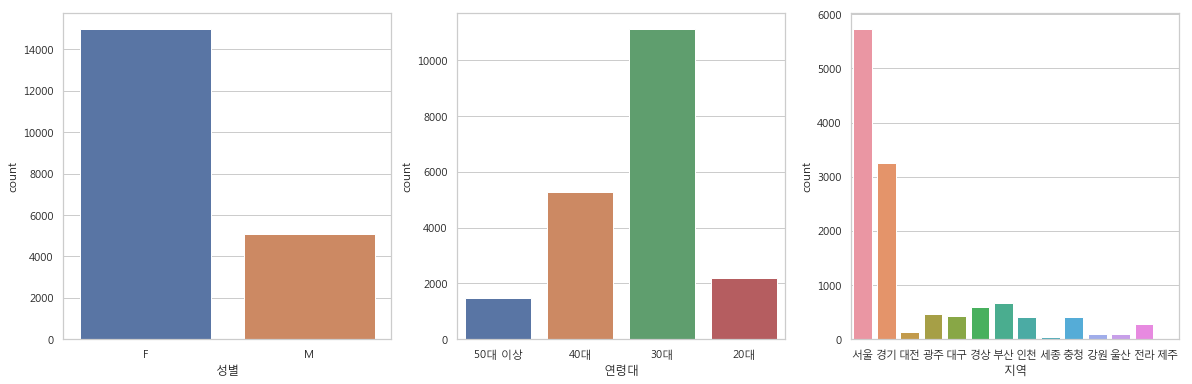

In [374]:
mpl.rc('figure', figsize=(20, 6))

plt.subplot(1,3,1)
sns.countplot(df2.성별)

plt.subplot(1,3,2)
sns.countplot(df2.연령대)

plt.subplot(1,3,3)
sns.countplot(df2.지역)

plt.show()

### 지역 상세(GIS 정보)

In [149]:
# data5 = df[(df.쿠폰사용 == '사용') & (df.할인금액 > 0)]
lotto = df2[['LAT', 'LON']].dropna()

In [150]:
import folium
from folium.plugins import MarkerCluster
 
# map1 = folium.Map(location=[36.5053542,127.7043419],zoom_start=8)
map1 = folium.Map(location=[37.543083,126.977378],zoom_start=11)
 
marker_cluster = MarkerCluster().add_to(map1)

for i in range(len(lotto)):
    folium.Marker(
    location=[lotto['LAT'].iloc[i] ,lotto['LON'].iloc[i]],
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)

In [8]:
# map1

# 메모리 문제로 인해, download 후 확인 가능
# map1.save('map.html')

### 1.월 충전 횟수 및 주기

In [3]:
dataD = df.copy()
dataD = dataD.sort_values(by=['UNFY_MMB_NO', 'REG_DT'], axis=0)

#충전과 충전 사이의 gap에 대한 계산
dataD['DIFF'] = dataD.groupby(['UNFY_MMB_NO'])['REG_DT'].transform(lambda x: x.diff()).dt.days

In [4]:
df5 = df2[['UNFY_MMB_NO', '이벤트참여_1902']]
df5 = df5[(df5['이벤트참여_1902'] ==1)]

dataE = pd.merge(dataD, df5, on='UNFY_MMB_NO')

In [5]:
# dataD.groupby(['UNFY_MMB_NO'])['REG_DT'].count()
# round((dataD.dropna().groupby(['UNFY_MMB_NO'])['SETL_AMT'].count()).mean(),2)

In [6]:
# data sample1
sample1 = dataD[(dataD['UNFY_MMB_NO'] == 4220624)]
# sample1

In [7]:
import matplotlib.dates as mdates

def member_behavior(회원번호):
    sample3 = dataD[(dataD['UNFY_MMB_NO'] == 회원번호)]
    print('회원({})은 총 {}회를 충전하였으며, 충전주기는 평균 {}일 이다.'.format( 회원번호, sample3['DIFF'].count(), round(sample3['DIFF'].mean(),1) ) )

    # sample 자료에 대한 timeline
    dates = sample3['REG_DT'].values
    levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(dates)]
    names =  sample3['GUBUN'].values

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)

    markerline, stemline, baseline = ax.stem(dates, levels, linefmt="C3-", basefmt="k-")

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

#### Case study

회원(3323773)은 총 33회를 충전하였으며, 충전주기는 평균 14.4일 이다.


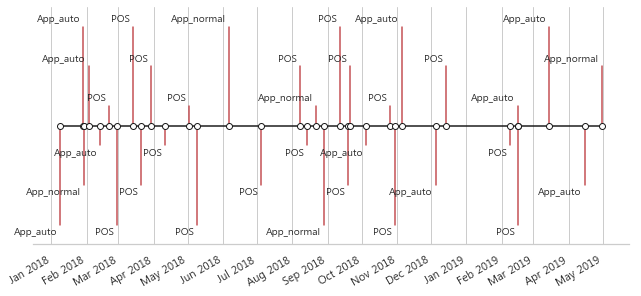

회원(4772778)은 총 24회를 충전하였으며, 충전주기는 평균 19.5일 이다.


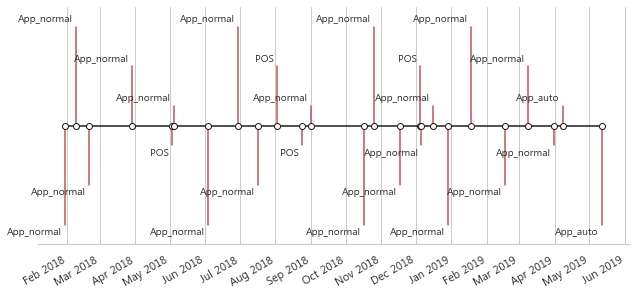

회원(5206142)은 총 3회를 충전하였으며, 충전주기는 평균 14.7일 이다.


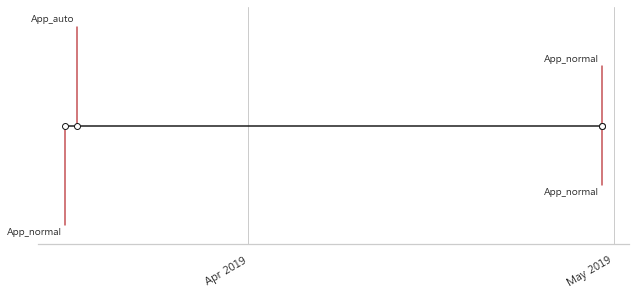

회원(4772746)은 총 46회를 충전하였으며, 충전주기는 평균 10.6일 이다.


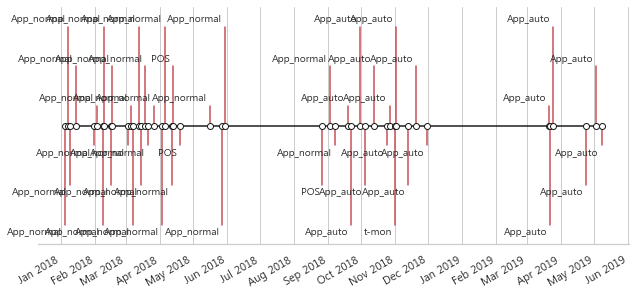

회원(3763099)은 총 11회를 충전하였으며, 충전주기는 평균 35.3일 이다.


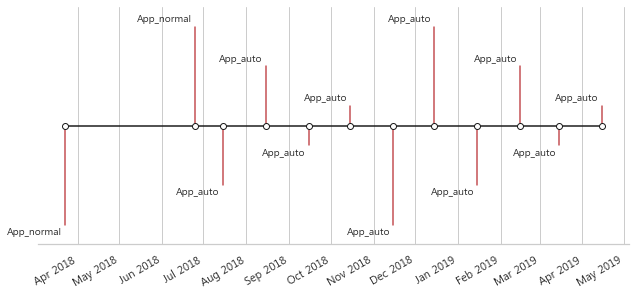

In [42]:
import random
ch = random.choices(dataE['UNFY_MMB_NO'], k=5)

for i in ch:
    member_behavior(i)

#### Summary

In [70]:
print('이러한 관점에서 보면, 회원의 평균 충전 횟수는 {:,}회 이다.'.format( round((dataD.dropna().groupby(['UNFY_MMB_NO'])['SETL_AMT'].count()).mean(),1) ) ) 
print('아울러, 회원의 평균적인 충전 주기는 {:,}일 이다.'.format( round(dataD['DIFF'].mean(),1) ) )

이러한 관점에서 보면, 회원의 평균 충전 횟수는 6.3회 이다.
아울러, 회원의 평균적인 충전 주기는 45.2일 이다.


### 2.월 충전 횟수와 주기와의 관계

In [81]:
dataD_diff1 = dataD[(dataD['DIFF'] > 0)].groupby(by = ['UNFY_MMB_NO'],as_index=False)['DIFF'].mean()
dataD_diff2 = dataD[(dataD['DIFF'] > 0)].groupby(by = ['UNFY_MMB_NO'],as_index=False)['GUBUN'].count()

dataD_diff3 = pd.merge(dataD_diff1, dataD_diff2)

dataD_diff = pd.merge(dataD_diff3, df2[['UNFY_MMB_NO', '이벤트참여_1902']], on ='UNFY_MMB_NO' )
dataD_diff.rename(columns={'DIFF': '충전주기', 'GUBUN': '충전횟수'}, inplace=True)

# dataD_diff = pd.merge(dataD_diff1, dataD_diff2).groupby(by = ['GUBUN'],as_index=False)['DIFF'].mean()
# dataD_diff = dataD_diff.groupby(by = ['GUBUN'],as_index=False)['DIFF'].mean()

In [82]:
dataD_cnt = round(dataD_diff.groupby(by = ['충전횟수'],as_index=False)['충전주기'].mean(),4)
dataD_evt = round(dataD_diff.groupby(by = ['충전횟수'],as_index=False)['이벤트참여_1902'].sum(),4)
dataD_mem = dataD_diff2.groupby(by = ['GUBUN'],as_index=False)['UNFY_MMB_NO'].count()
dataD_mem.rename(columns={'GUBUN': '충전횟수', 'UNFY_MMB_NO': '인원'}, inplace=True)

dataD_fin = pd.merge(dataD_cnt, dataD_evt, on ='충전횟수')
dataD_fin = pd.merge(dataD_fin, dataD_mem, on ='충전횟수')

#### Graph

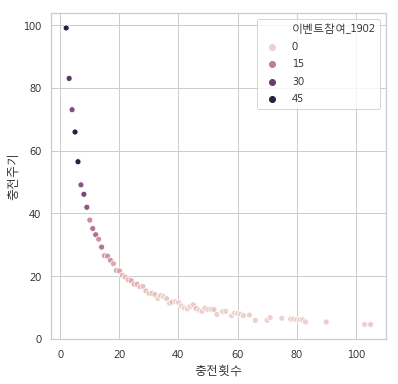

In [83]:
# 전체 회원의 충전 평균(일) - 2회 이상 충전

mpl.rc('figure', figsize=(6, 6))

sns.scatterplot(x = '충전횟수', y='충전주기', 
                hue = '이벤트참여_1902',
#                 size = '인원',
#                 sizes=(40, 400), alpha=.5, palette="muted",
                data=dataD_fin[(dataD_fin['충전횟수'] > 1) & (dataD_fin['충전횟수'] < 200)])
plt.show()

**Comment**

+ 충전 주기와 충전횟수는 반비례 관계가 성립하고 있다.